<a href="https://colab.research.google.com/github/Shyams728/copper_ml_project/blob/main/industrial_copper_modeling_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##load the dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
df = pd.read_excel('/content/drive/MyDrive/data/Copper_Set.xlsx')
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33


In [ ]:
#lets have peek into the catagories in each dataset
for data in df:
  print(data ,':', len(df[data].unique()))

id : 181672
item_date : 253
quantity tons : 181673
customer : 1170
country : 18
status : 10
item type : 7
application : 31
thickness : 595
width : 1386
material_ref : 16564
product_ref : 33
delivery date : 29
selling_price : 9796


In [ ]:
df.isnull().sum() # Check for missing values

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [ ]:
raw_df = df.copy()

##Data Cleaning

In [ ]:
# Drop columns with a high percentage of missing values
missing_threshold = 0.5  # Set a threshold for missing values
raw_df = raw_df.dropna(thresh=df.shape[0] * (1 - missing_threshold), axis=1)

In [ ]:
raw_df.columns = [column.replace(' ', '_') for column in raw_df.columns]
raw_df.rename({'customer': 'customer_code', 'country': 'country_code'}, axis=1, inplace=True)

In [ ]:
raw_df.columns

Index(['id', 'item_date', 'quantity_tons', 'customer_code', 'country_code',
       'status', 'item_type', 'application', 'thickness', 'width',
       'material_ref', 'product_ref', 'delivery_date', 'selling_price'],
      dtype='object')

In [ ]:
raw_df = raw_df.drop_duplicates()

In [ ]:
# Drop rows with missing values mostly they are negligible
columns_with_missing = ['id','item_date', 'customer_code', 'status', 'thickness', 'delivery_date', 'selling_price']
raw_df = raw_df.dropna(subset=columns_with_missing)

In [ ]:
from sklearn.impute import KNNImputer

# Impute missing values based on the weighted average of their k-nearest neighbors.
imputer = KNNImputer(n_neighbors=5)
raw_df['country_code'] = imputer.fit_transform(raw_df[['country_code']])

#country and application are categorical data and filled with the mode which is most common
raw_df['application'].fillna(raw_df['application'].mode()[0], inplace=True)

In [ ]:
starts_with_zero = (raw_df['material_ref'].str.startswith('000000000')).sum()
null_values = raw_df['material_ref'].isnull().sum()
print(f'Starts with zero : {starts_with_zero}')
print(f'Null_values : {null_values}')
print('Unusefull_data :', unusefull_data := starts_with_zero + null_values)
print('Total_values :', total_values := len(df.material_ref))

Starts with zero : 22690
Null_values : 77913
Unusefull_data : 100603
Total_values : 181673


In [ ]:
print('percentage of missing info : ',(unusefull_data/total_values) * 100)

percentage of missing info :  55.3758676303028



- **Issue:**
  - More than half of the column contains null values.

- **Imputation Challenge:**
  - Imputation is typically considered for smaller proportions of missing data.
  - Imputing with a small portion of available data may lead to misleading results.

- **Decision:**
  - Given the substantial null values, the decision is to drop this column.

- **Note:**
  - In real-world scenarios,domain_knowledge and client consultation would help.
  - Deciding between imputation and dropping depends on data integrity, analysis goals, and project objectives.

In [ ]:
#material_ref niether the categorical nor the numerical data it wont be suitable for the model because its value is unque and asystematic
raw_df.drop('material_ref', axis=1, inplace=True)

In [ ]:
raw_df.isnull().sum()

id               0
item_date        0
quantity_tons    0
customer_code    0
country_code     0
status           0
item_type        0
application      0
thickness        0
width            0
product_ref      0
delivery_date    0
selling_price    0
dtype: int64

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181664 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181664 non-null  object 
 1   item_date      181664 non-null  float64
 2   quantity_tons  181664 non-null  object 
 3   customer_code  181664 non-null  float64
 4   country_code   181664 non-null  float64
 5   status         181664 non-null  object 
 6   item_type      181664 non-null  object 
 7   application    181664 non-null  float64
 8   thickness      181664 non-null  float64
 9   width          181664 non-null  float64
 10  product_ref    181664 non-null  int64  
 11  delivery_date  181664 non-null  float64
 12  selling_price  181664 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 19.4+ MB


In [ ]:
raw_df.head(2)

,id,item_date,quantity_tons,customer_code,country_code,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,20210701.0,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,20210401.0,1047.0


In [ ]:
categorical_features = ['customer_code','country_code', 'application', 'item_type', 'status']
for feature in categorical_features:
    raw_df[feature] = raw_df[feature].astype(str)
    raw_df[feature] = raw_df[feature].replace('\.0', '', regex=True)
    print(raw_df[feature].value_counts())


customer_code
30157111    4988
30161088    3733
30201846    3152
30165529    2728
30202938    2570
            ... 
30271383       1
30356502       1
30357481       1
30156053       1
30271291       1
Name: count, Length: 1169, dtype: int64
country_code
78                   32084
26                   27515
25                   23361
27                   21508
32                   18658
28                   15823
84                   12776
77                    9714
30                    8702
39                    3730
79                    2742
38                    1712
40                    1683
80                     817
113                    714
89                      92
44.89327005659671       28
107                      5
Name: count, dtype: int64
application
10    77561
41    46261
15    20771
59     8926
42     5858
56     4846
29     1937
27     1784
26     1650
28     1591
40     1576
25     1498
79     1422
22     1023
20      768
66      718
3       657
38      511
58    

In [ ]:
# Convert 'item_date' and 'delivery_date' columns to date format
raw_df['item_date'] = pd.to_datetime(raw_df['item_date'], format='%Y%m%d', errors='coerce')
raw_df['delivery_date'] = pd.to_datetime(raw_df['delivery_date'], format='%Y%m%d', errors='coerce')


In [ ]:
raw_df.head(1)

,id,item_date,quantity_tons,customer_code,country_code,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308,28,Won,W,10,2.0,1500.0,1670798778,2021-07-01,854.0


In [ ]:
try:
    raw_df['quantity_tons'] =  raw_df['quantity_tons'].astype('float64')
except Exception as e:
    print(f'An Error Occurred: {e}')

An Error Occurred: could not convert string to float: 'e'


In [ ]:
for x, data in enumerate(raw_df['quantity_tons']):
    if str(data).isalnum():
        print(x,data)


173013 1000000000
173077 e
173202 50000000


In [ ]:
# Convert 'quantity tons' to float, coercing non-numeric values to NaN
raw_df['quantity_tons'] = pd.to_numeric(raw_df['quantity_tons'], errors='coerce')

# Calculate the mean of valid numeric values
mean_value = raw_df['quantity_tons'].mean()

# Replace NaN values with the calculated mean
raw_df['quantity_tons'].fillna(mean_value, inplace=True)
raw_df['quantity_tons'].astype(float)

# Make negative values to because weight canot be negetive absolute
raw_df['quantity_tons'] = raw_df['quantity_tons'].abs()

In [ ]:
raw_df['application']=raw_df['application'].astype(int).astype('category')
raw_df['country_code']=raw_df['country_code'].astype(float).astype(int).astype('category')
raw_df['customer_code']=raw_df['customer_code'].astype(int).astype('category')
raw_df['item_type']=raw_df['item_type'].astype('category')
raw_df['status']=raw_df['status'].astype('category')
raw_df['product_ref']=raw_df['product_ref'].astype('category')

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181664 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181664 non-null  object        
 1   item_date      181662 non-null  datetime64[ns]
 2   quantity_tons  181664 non-null  float64       
 3   customer_code  181664 non-null  category      
 4   country_code   181664 non-null  category      
 5   status         181664 non-null  category      
 6   item_type      181664 non-null  category      
 7   application    181664 non-null  category      
 8   thickness      181664 non-null  float64       
 9   width          181664 non-null  float64       
 10  product_ref    181664 non-null  category      
 11  delivery_date  181662 non-null  datetime64[ns]
 12  selling_price  181664 non-null  float64       
dtypes: category(6), datetime64[ns](2), float64(4), object(1)
memory usage: 12.3+ MB


In [ ]:
# Use boolean indexing to select rows with null values in any column
null_rows = raw_df[raw_df.isna().any(axis=1)]
null_rows


,id,item_date,quantity_tons,customer_code,country_code,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price
52,175B56C3-CDF1-4BD4-BC83-C1BF1FEAD8B8,NaT,27.743221,30162161,77,Won,S,4,1.1,1300.0,164141591,2021-06-01,1046.0
58,9600E05B-D1F9-4E71-B525-60D64129E8AE,2021-04-01,13.634770,30271717,28,To be approved,W,10,0.6,1250.0,611993,NaT,1266.0
105421,4536FA48-F914-45EE-8275-261B07C24E8F,2020-11-12,30.714021,30350566,28,Won,S,70,0.6,1250.0,611993,NaT,825.0
105485,40203729-1A96-481E-9B71-3FF672C27F0B,NaT,101.742899,30210087,26,Lost,S,42,3.0,1494.0,1668701718,2021-02-01,795.0


####here the missing dates are improper dates which are not fit into date month year pattern

In [ ]:
# Check missing values before interpolation
print("Missing values before interpolation:")
print(raw_df[['item_date', 'delivery_date']].isnull().sum())

# Perform time-based interpolation
raw_df['item_date'].interpolate(method='pad', inplace=True)
raw_df['delivery_date'].interpolate(method='pad', inplace=True)


# Check missing values after interpolation
print("\nMissing values after interpolation:")
print(raw_df[['item_date', 'delivery_date']].isnull().sum())


Missing values before interpolation:
item_date        2
delivery_date    2
dtype: int64

Missing values after interpolation:
item_date        0
delivery_date    0
dtype: int64


In [ ]:
# id column is unique number not much usefull for the study
print('Number of unique ids : ',len(raw_df.id.unique()))
raw_df.drop('id', axis=1, inplace=True)

Number of unique ids :  181664


In [ ]:
raw_df.isnull().sum()

item_date        0
quantity_tons    0
customer_code    0
country_code     0
status           0
item_type        0
application      0
thickness        0
width            0
product_ref      0
delivery_date    0
selling_price    0
dtype: int64

In [ ]:
#saving data into exel file
raw_df.to_excel('/content/drive/MyDrive/data/processed_Copper_Set_cleaned.xlsx',index=False)

In [ ]:
cleaned_df = raw_df.copy()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [ ]:
cleaned_df = pd.read_excel(r'/content/drive/MyDrive/data/processed_Copper_Set_cleaned.xlsx')

In [ ]:
cleaned_df.head()

,item_date,quantity_tons,customer_code,country_code,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price
0,2021-04-01,54.151139,30156308,28,Won,W,10,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938,25,Won,W,41,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963,30,Won,WI,28,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574,32,Won,S,59,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560,28,Won,W,10,4.00,2000.0,640665,2021-03-01,577.00


In [ ]:
# Check the distribution of numerical features
numerical_features = ['quantity_tons', 'thickness', 'width', 'selling_price']

In [ ]:
# Check the distribution of numerical features
numerical_features = ['quantity_tons', 'thickness', 'width', 'selling_price']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(cleaned_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

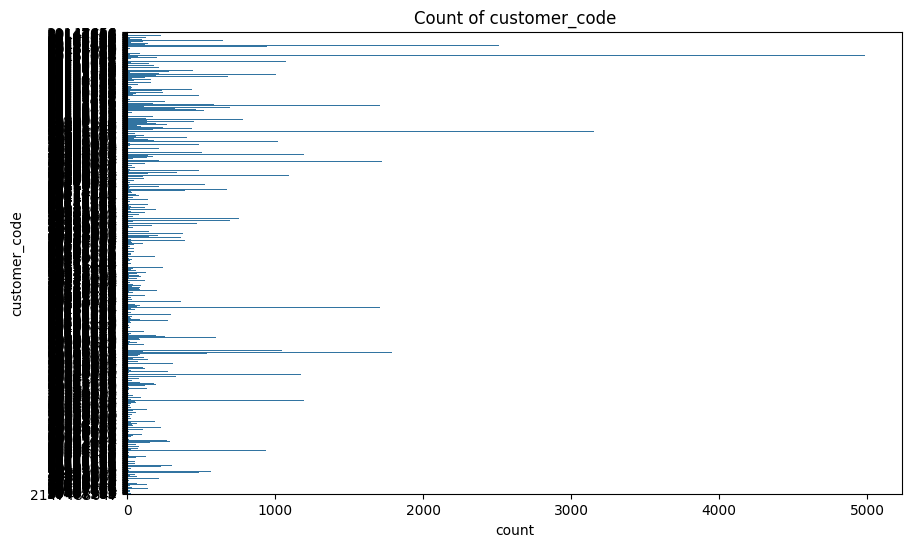

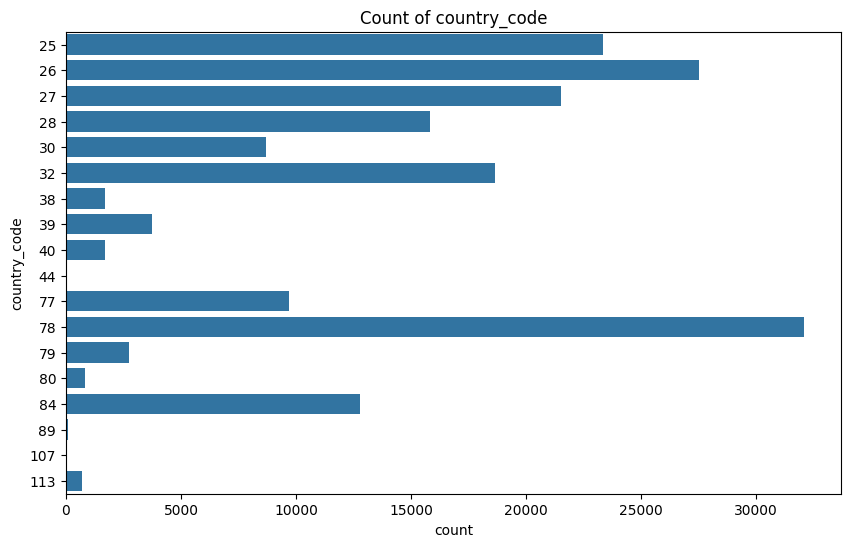

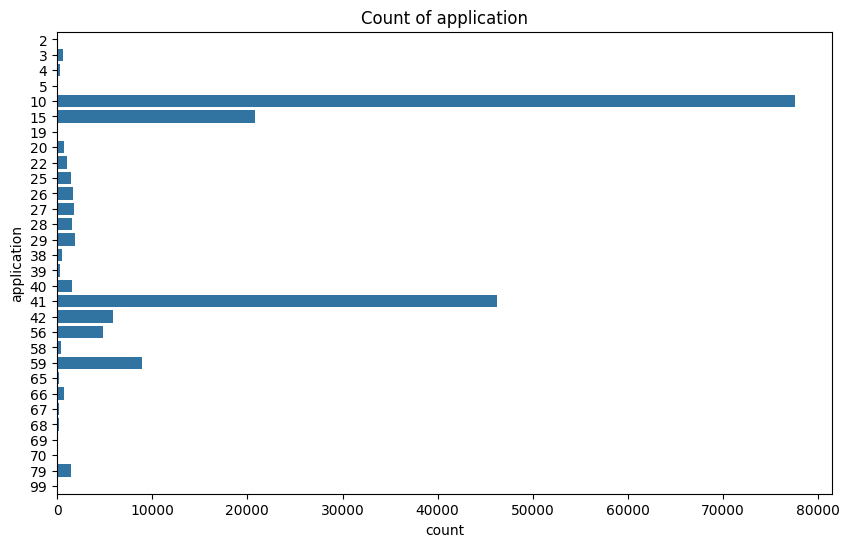

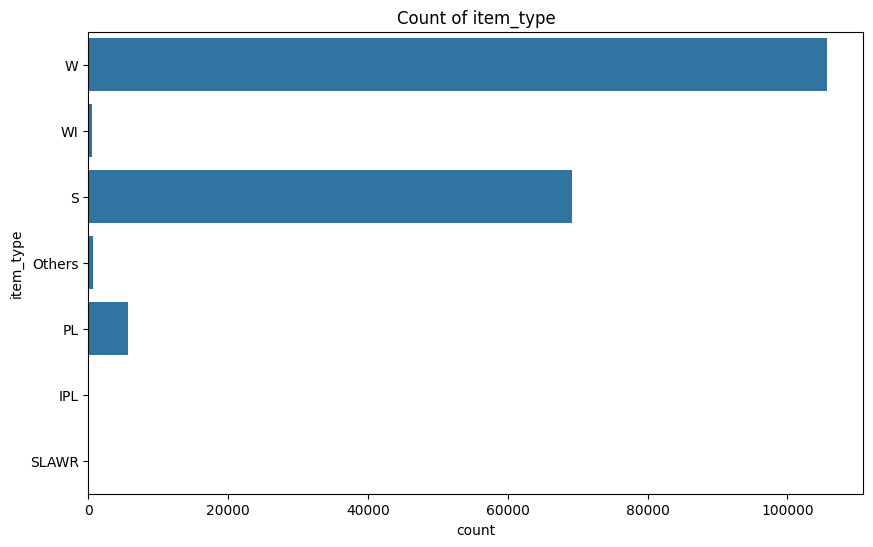

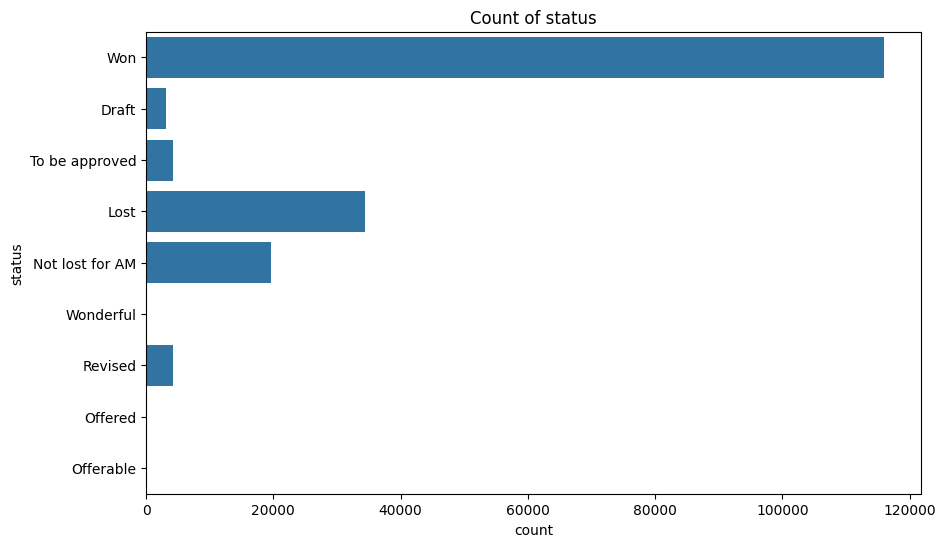

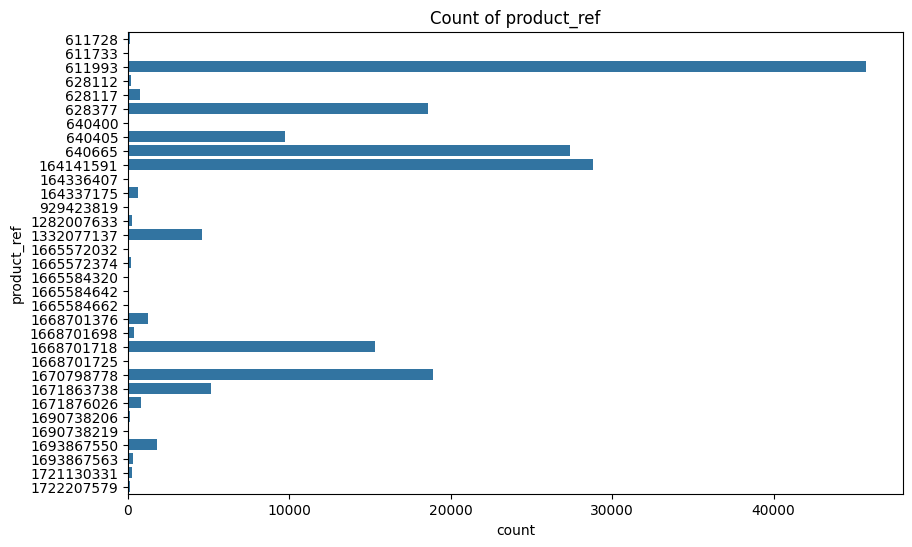

In [ ]:
# Check the distribution of categorical features
categorical_features = ['customer_code', 'country_code', 'application', 'item_type', 'status', 'product_ref']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=cleaned_df[feature])
    plt.title(f'Count of {feature}')
    plt.show()

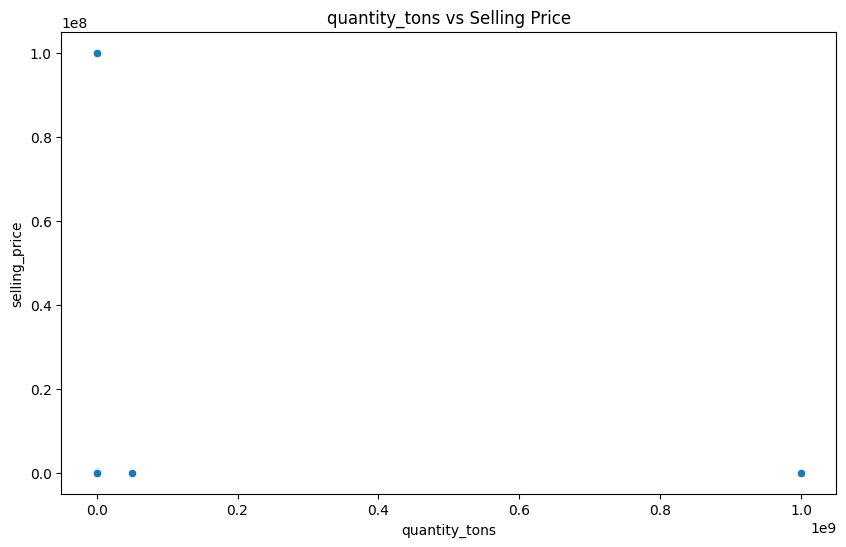

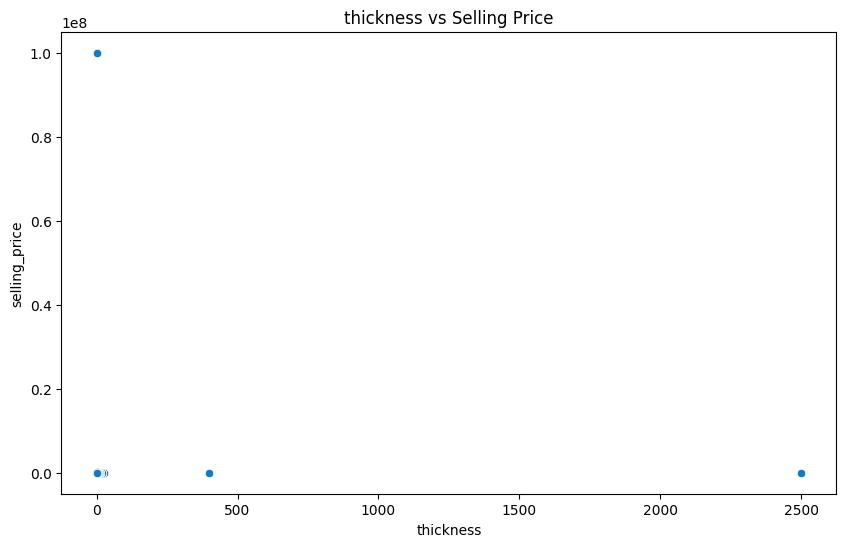

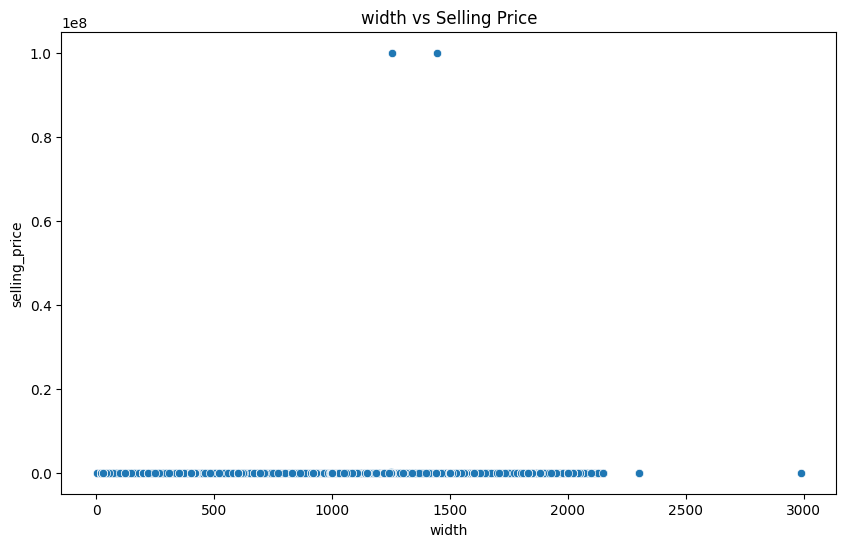

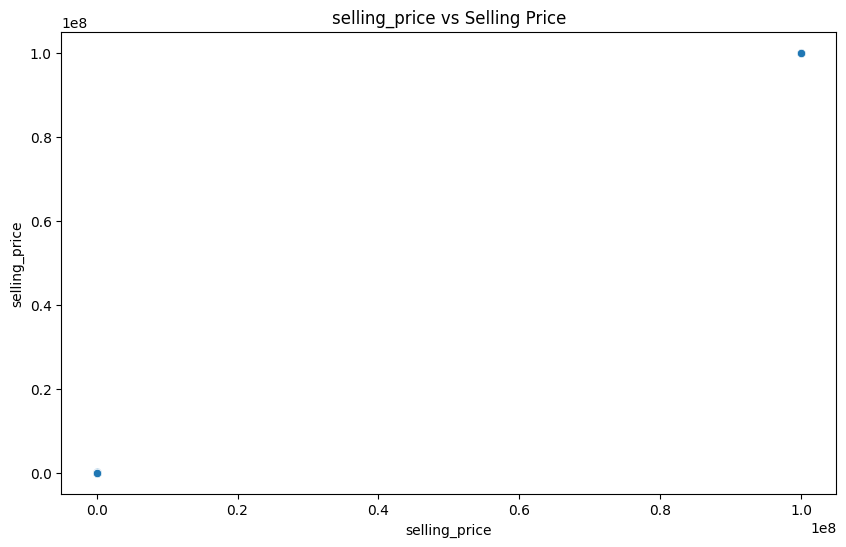

In [ ]:
# Check the relationship between numerical features and target variable (selling_price)
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=cleaned_df[feature], y=cleaned_df['selling_price'])
    plt.title(f'{feature} vs Selling Price')
    plt.show()


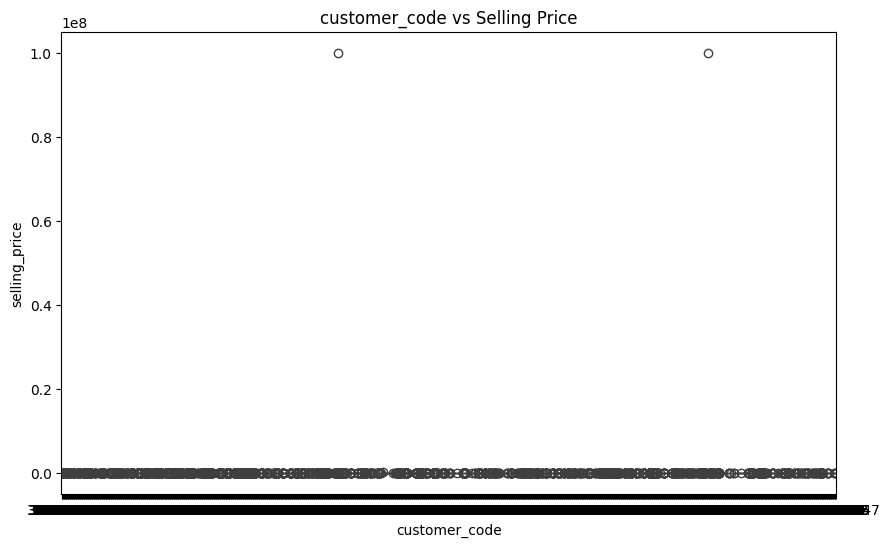

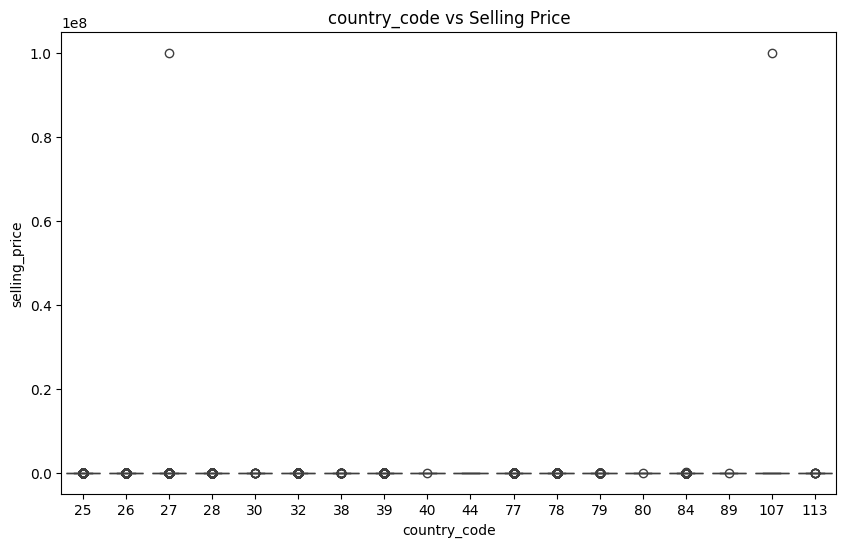

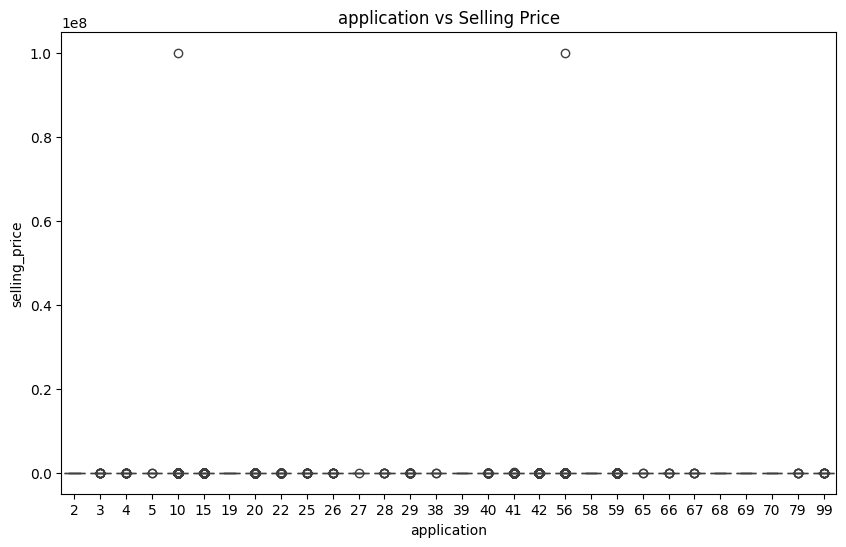

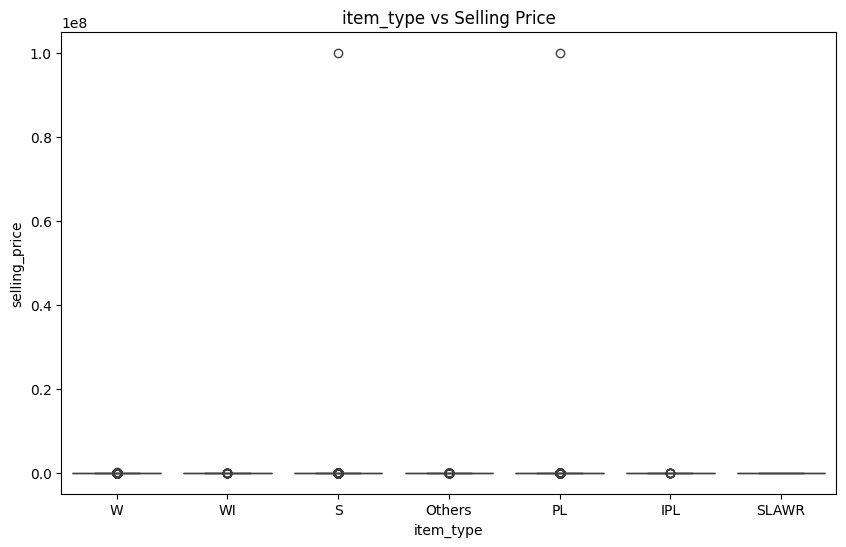

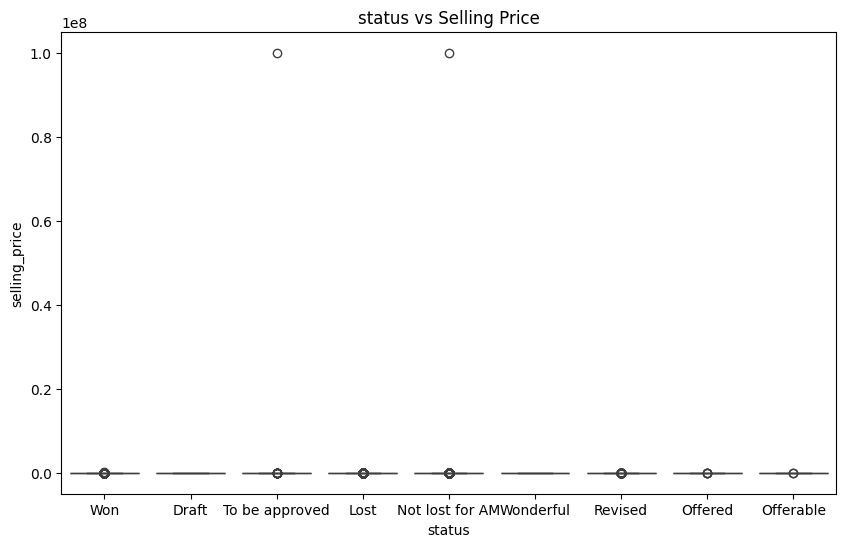

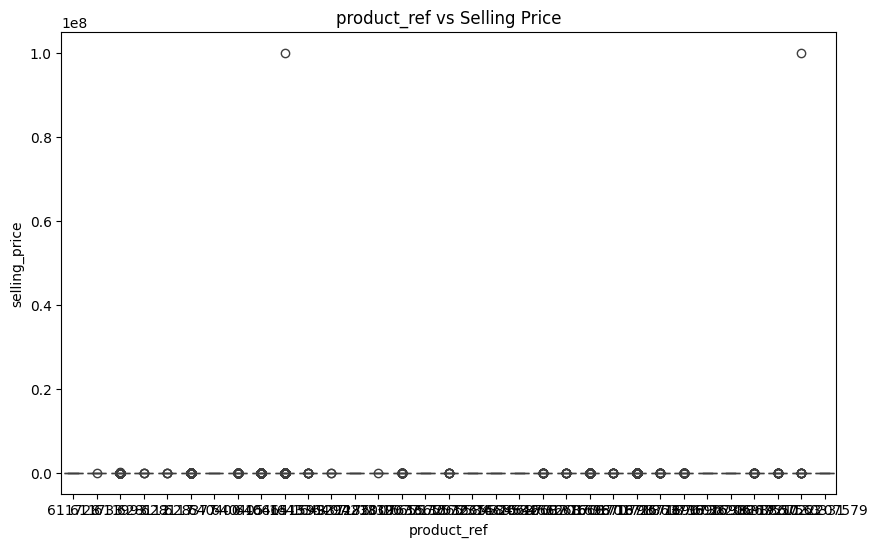

In [ ]:

# Check the relationship between categorical features and target variable (selling_price)
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cleaned_df[feature], y=cleaned_df['selling_price'])
    plt.title(f'{feature} vs Selling Price')
    plt.show()

In [ ]:
# Convert categorical variables to numerical using one-hot encoding
cleaned_df = pd.get_dummies(cleaned_df, columns=categorical_features, drop_first=True)

# Check for highly correlated features
correlation_matrix = cleaned_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Drop highly correlated features if necessary
# For example, if 'width' and 'thickness' are highly correlated, you might drop one of them
# cleaned_df.drop(['width'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

# Regression Model for Selling Price
X_reg = cleaned_df.drop(['selling_price'], axis=1)
y_reg = cleaned_df['selling_price']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)
print(f'Regression MSE: {mean_squared_error(y_test_reg, y_pred_reg)}')

# Classification Model for Status
cleaned_df['status'] = cleaned_df['status'].map({'Won': 1, 'Lost': 0})
X_class = cleaned_df.drop(['status'], axis=1)
y_class = cleaned_df['status']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

class_model = RandomForestClassifier(n_estimators=100, random_state=42)
class_model.fit(X_train_class, y_train_class)
y_pred_class = class_model.predict(X_test_class)
print(f'Classification Accuracy: {accuracy_score(y_test_class, y_pred_class)}')